# Imports


In [89]:
import numpy as np
import pandas as pd
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import shuffle

# Data

In [90]:
try:
    data = pd.read_csv('/kaggle/input/cars-dataset-audi-bmw-ford-hyundai-skoda-vw/cars_dataset.csv')
except FileNotFoundError:
    data = pd.read_csv('cars_dataset.csv')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [92]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


## Nulls

In [93]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [94]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Make'],
      dtype='object')

# Draw

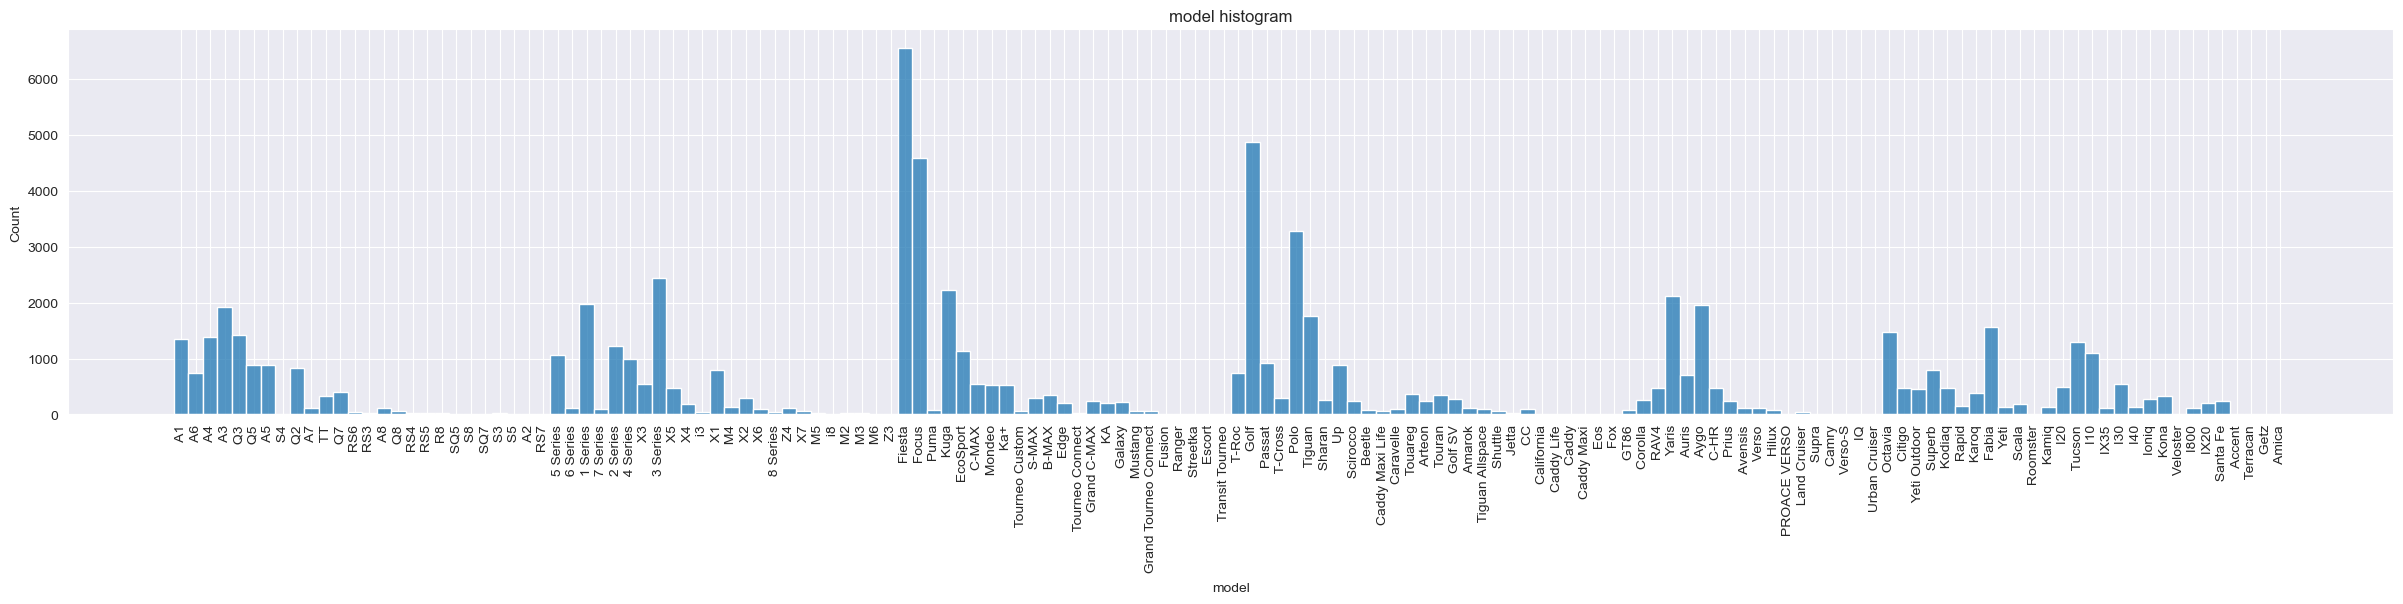

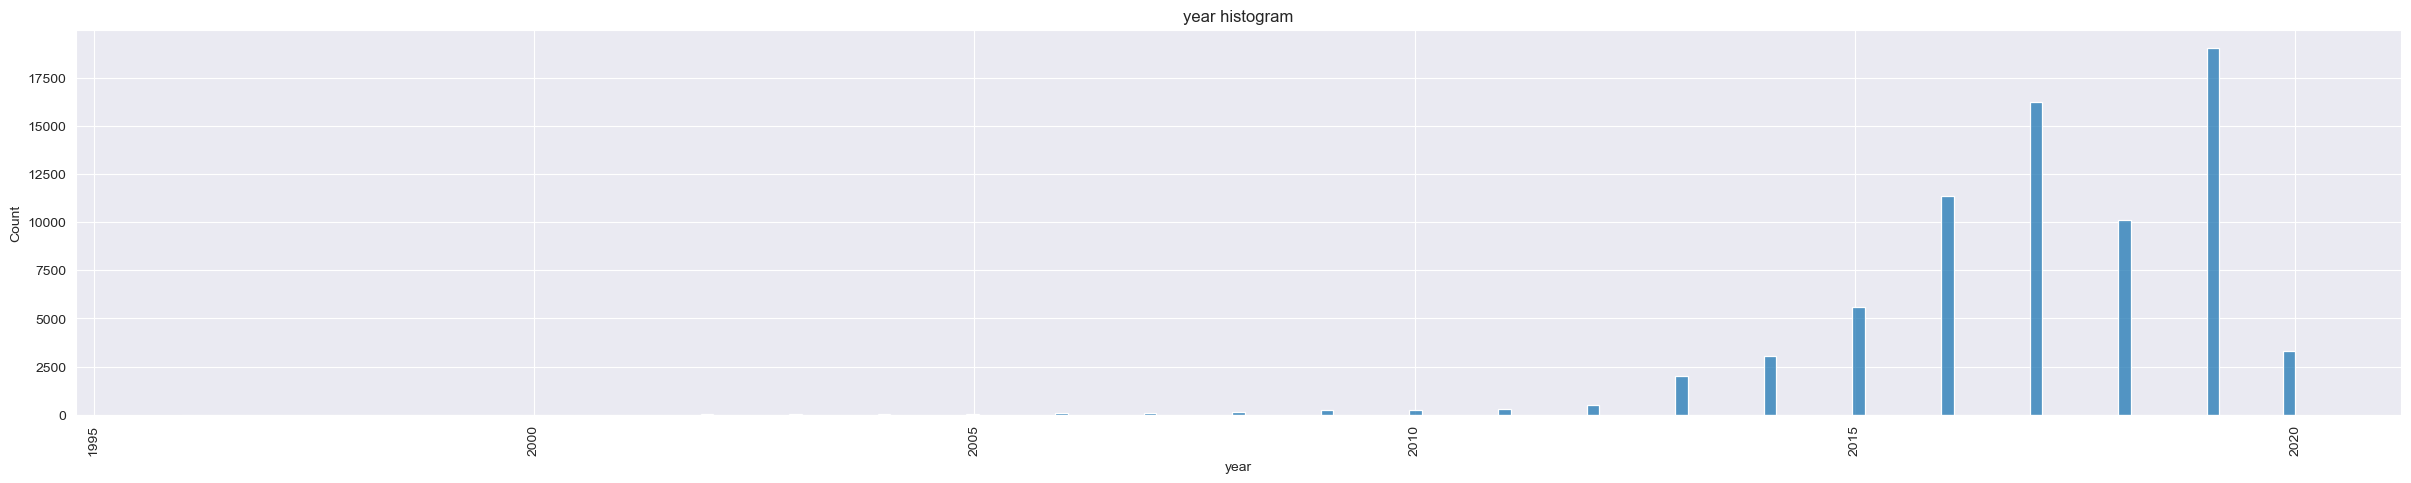

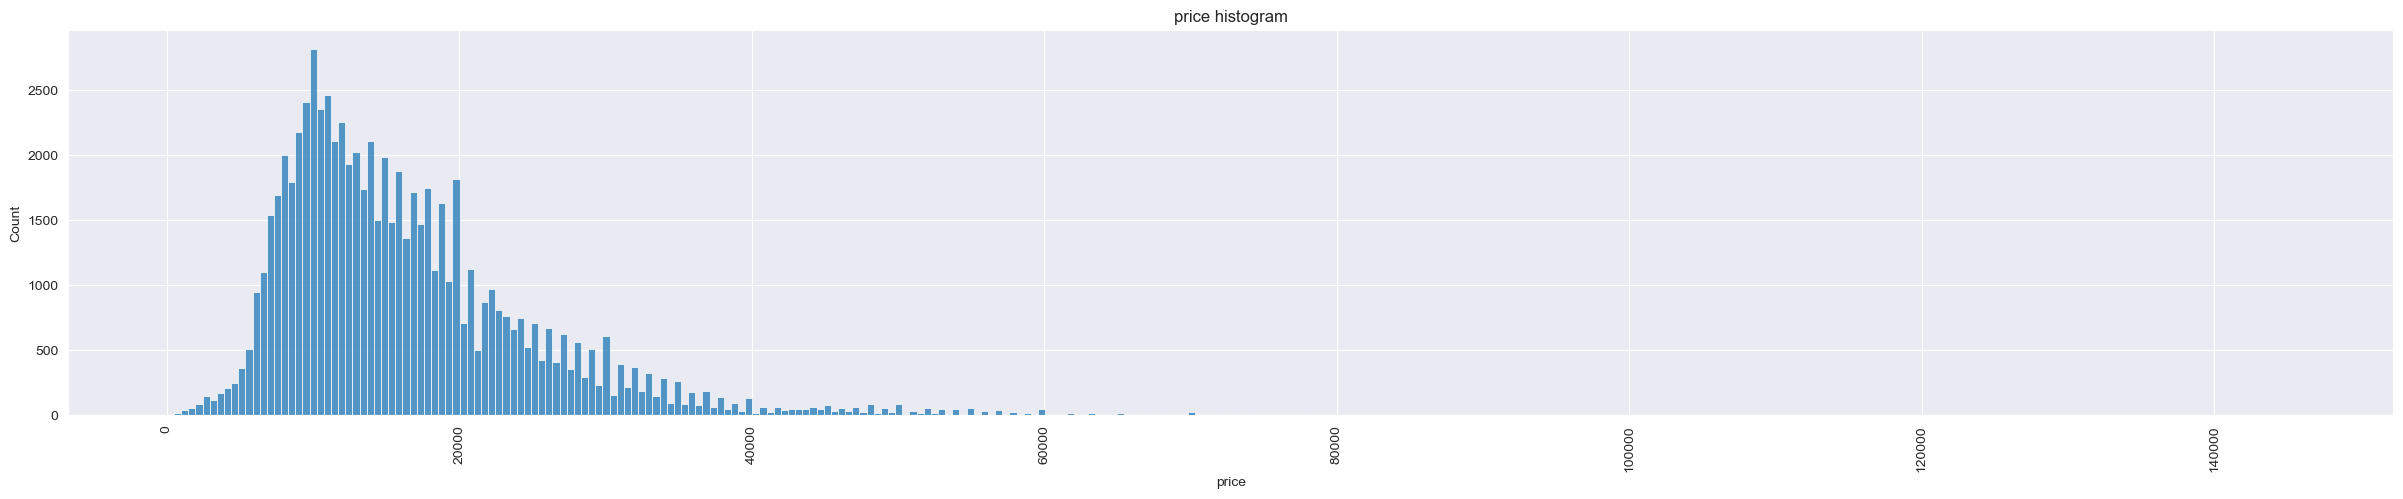

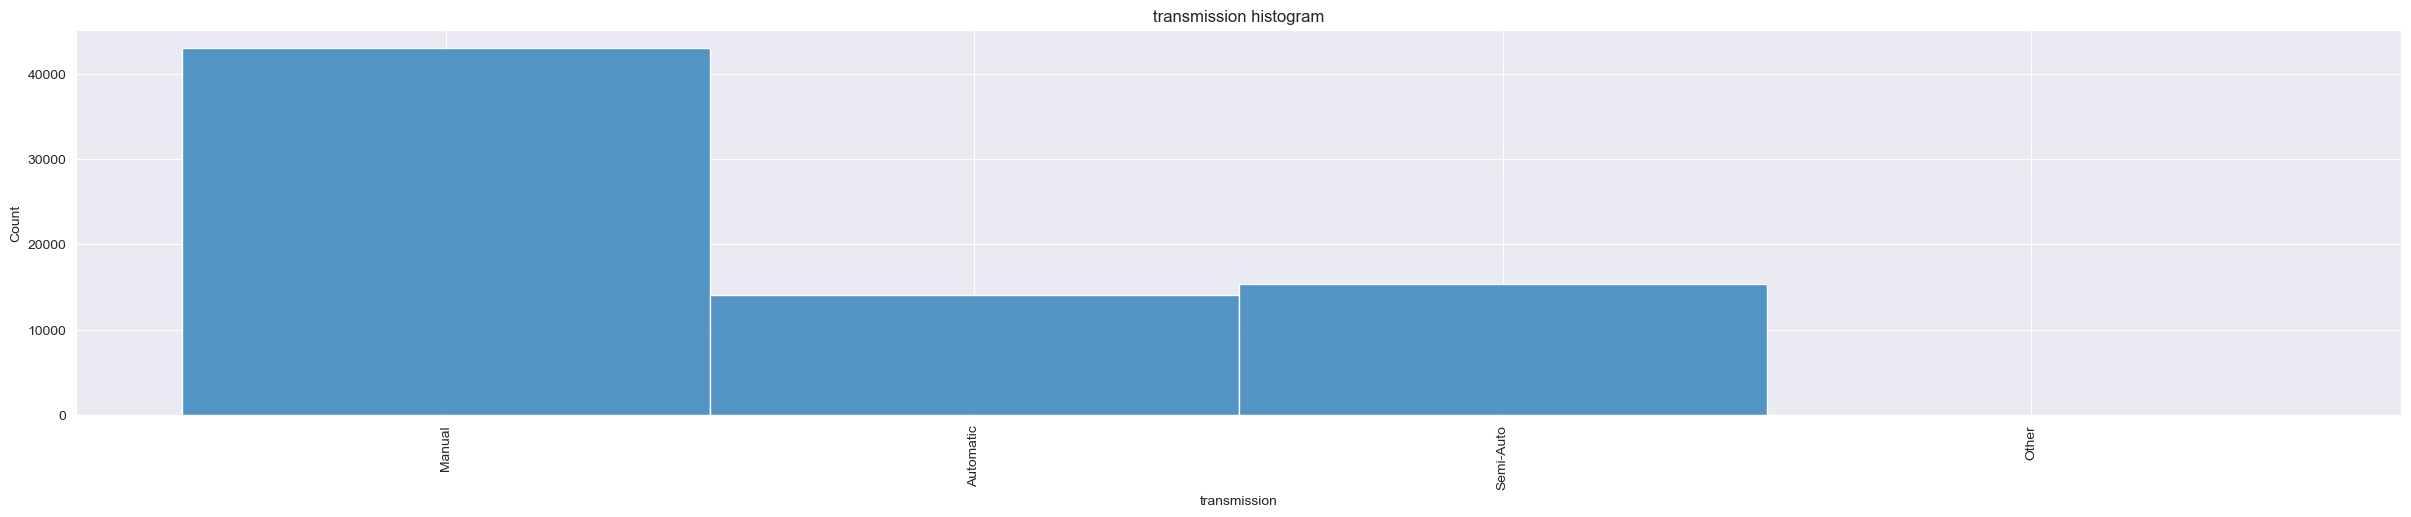

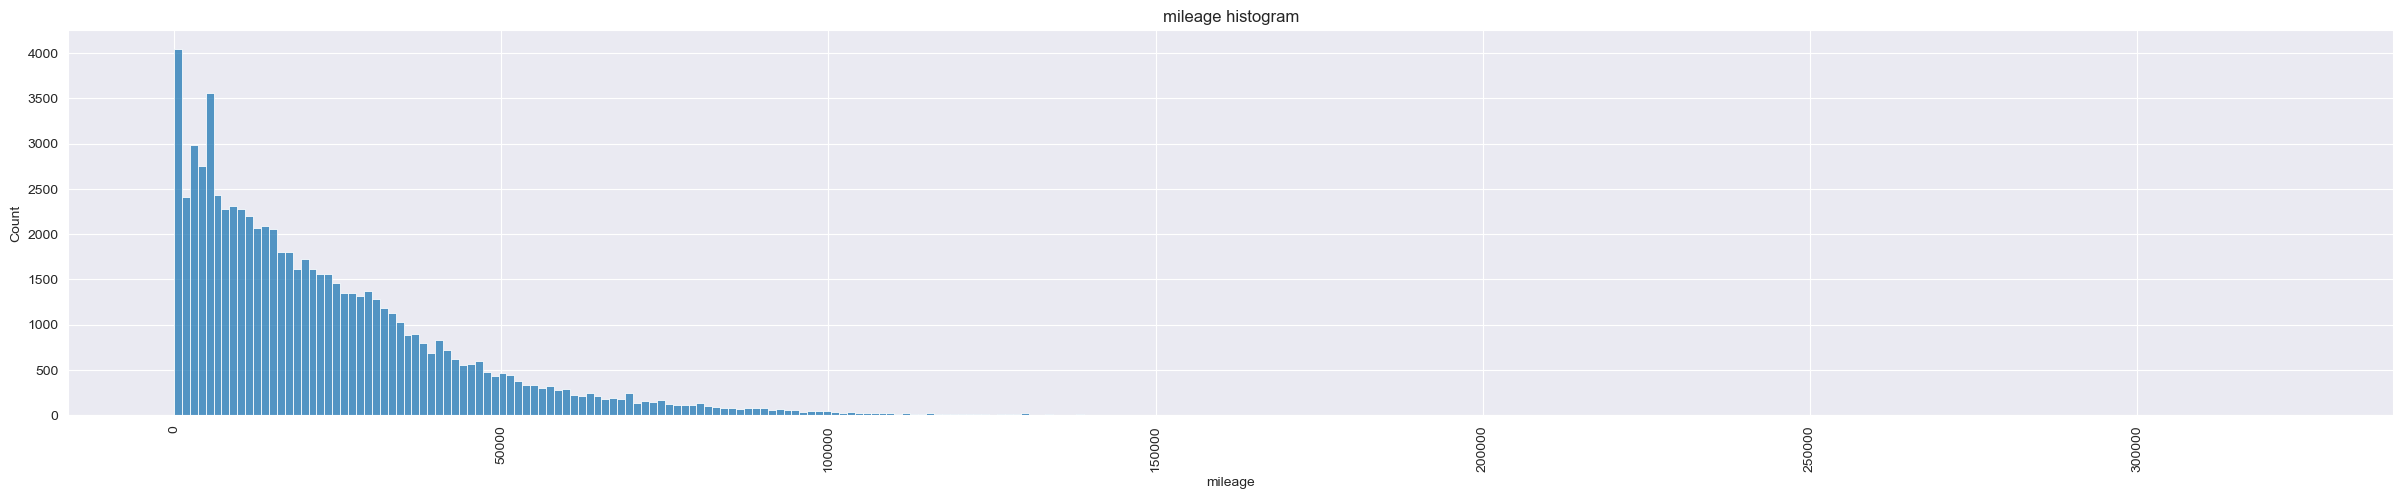

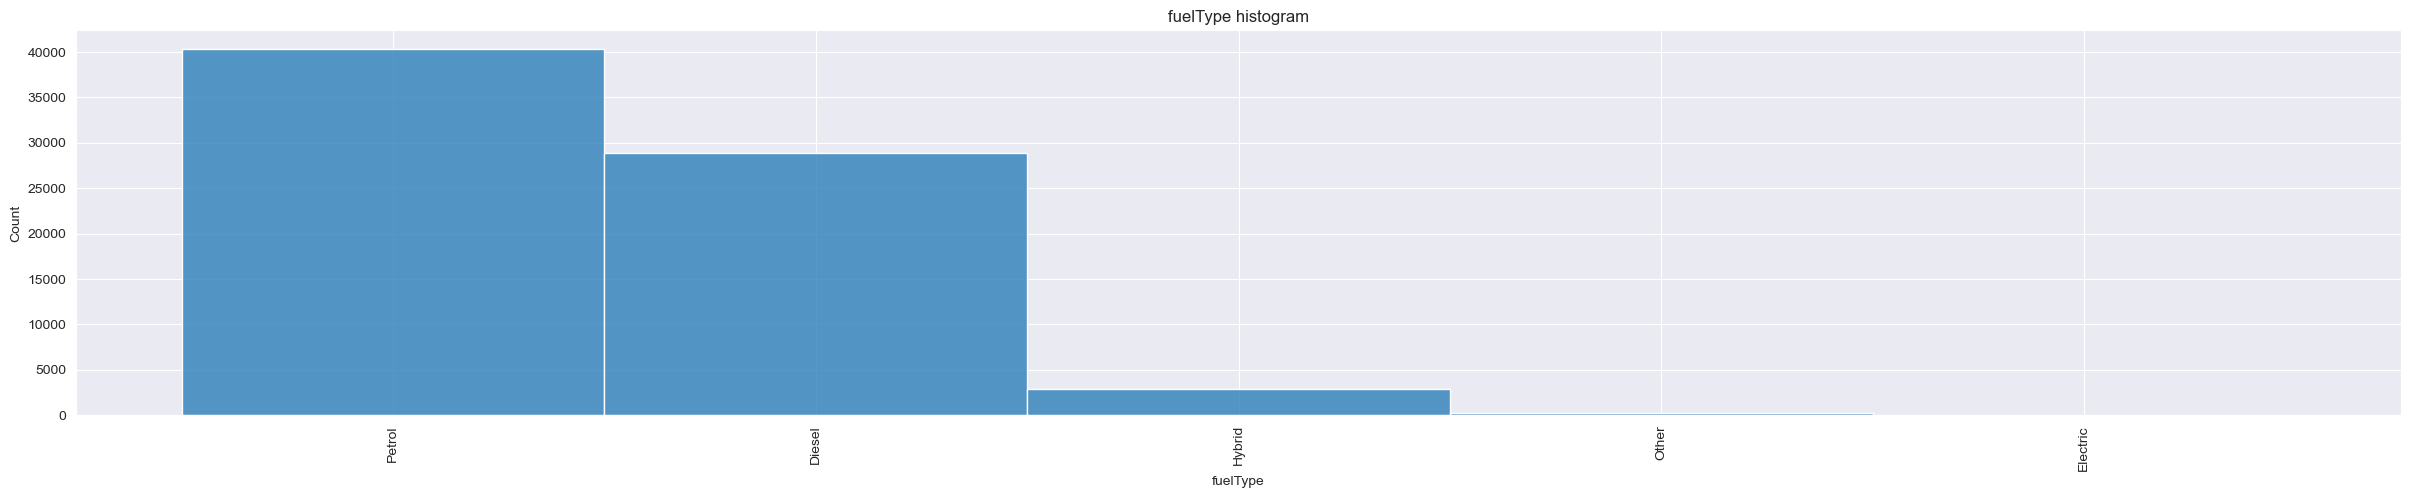

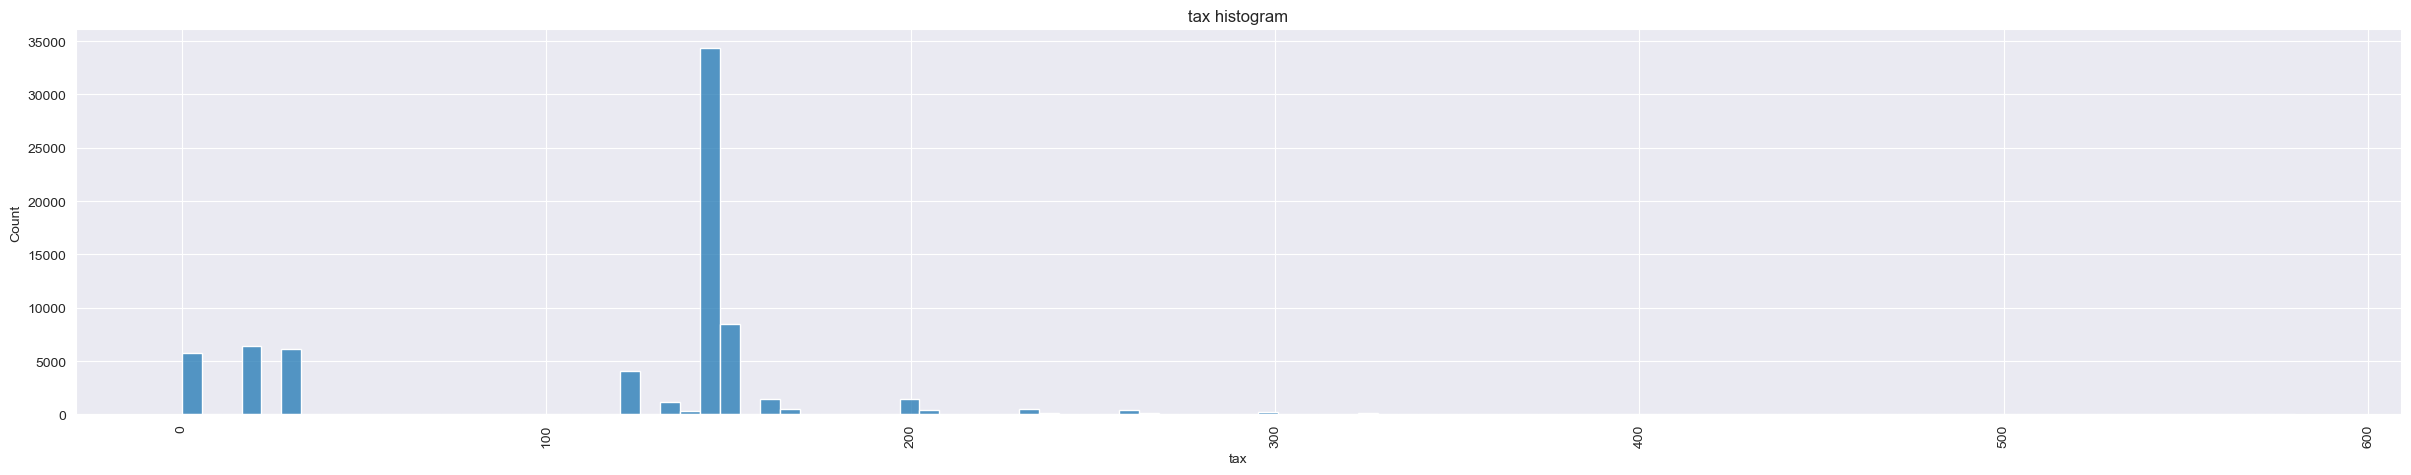

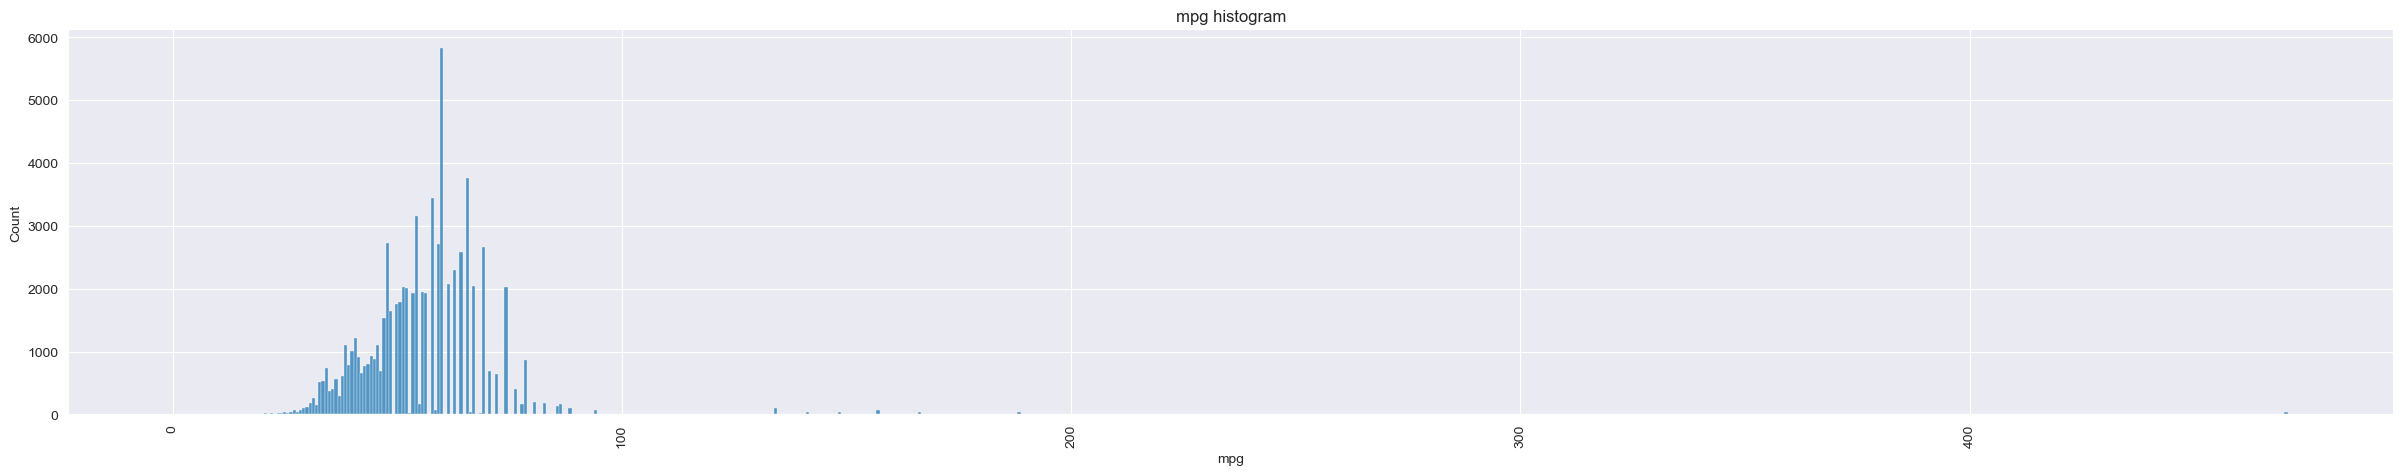

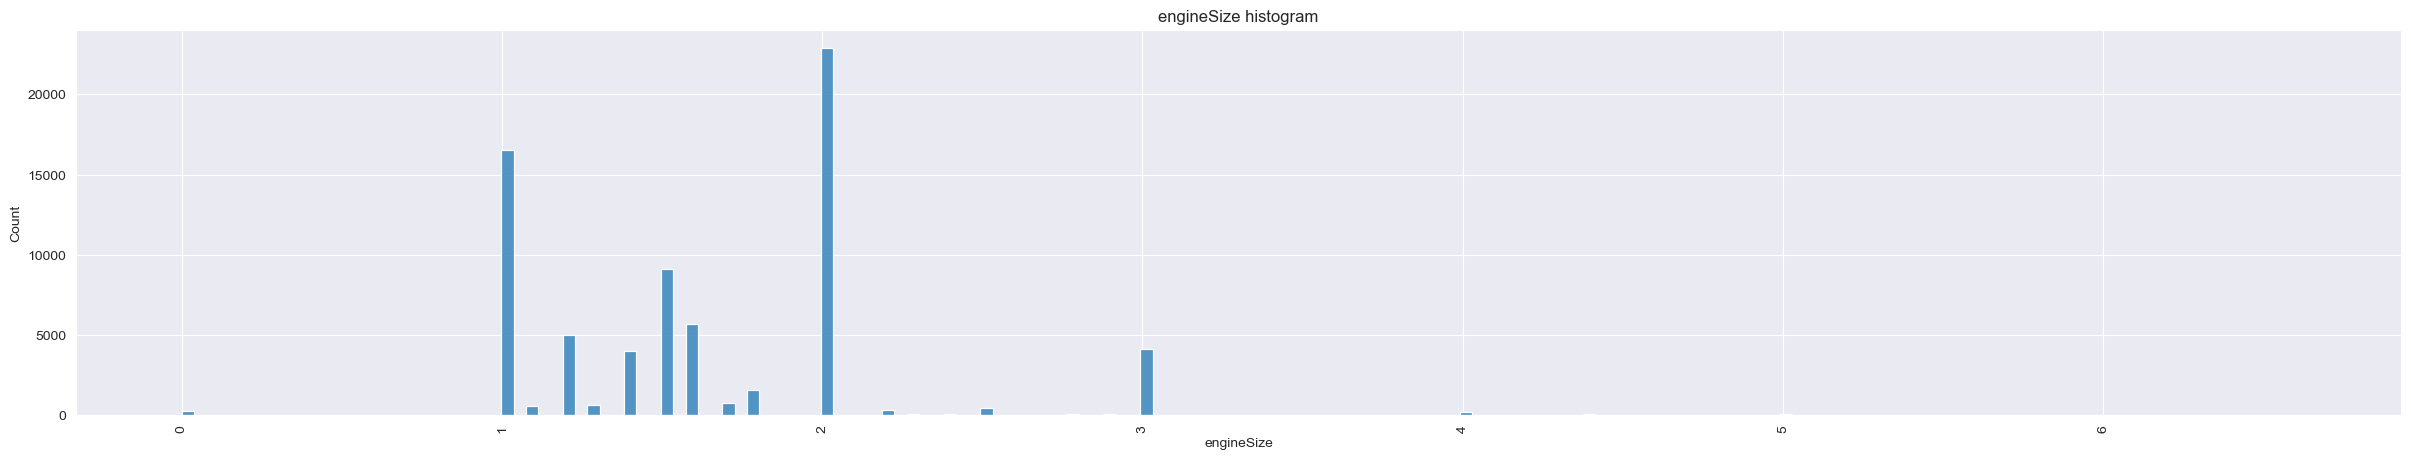

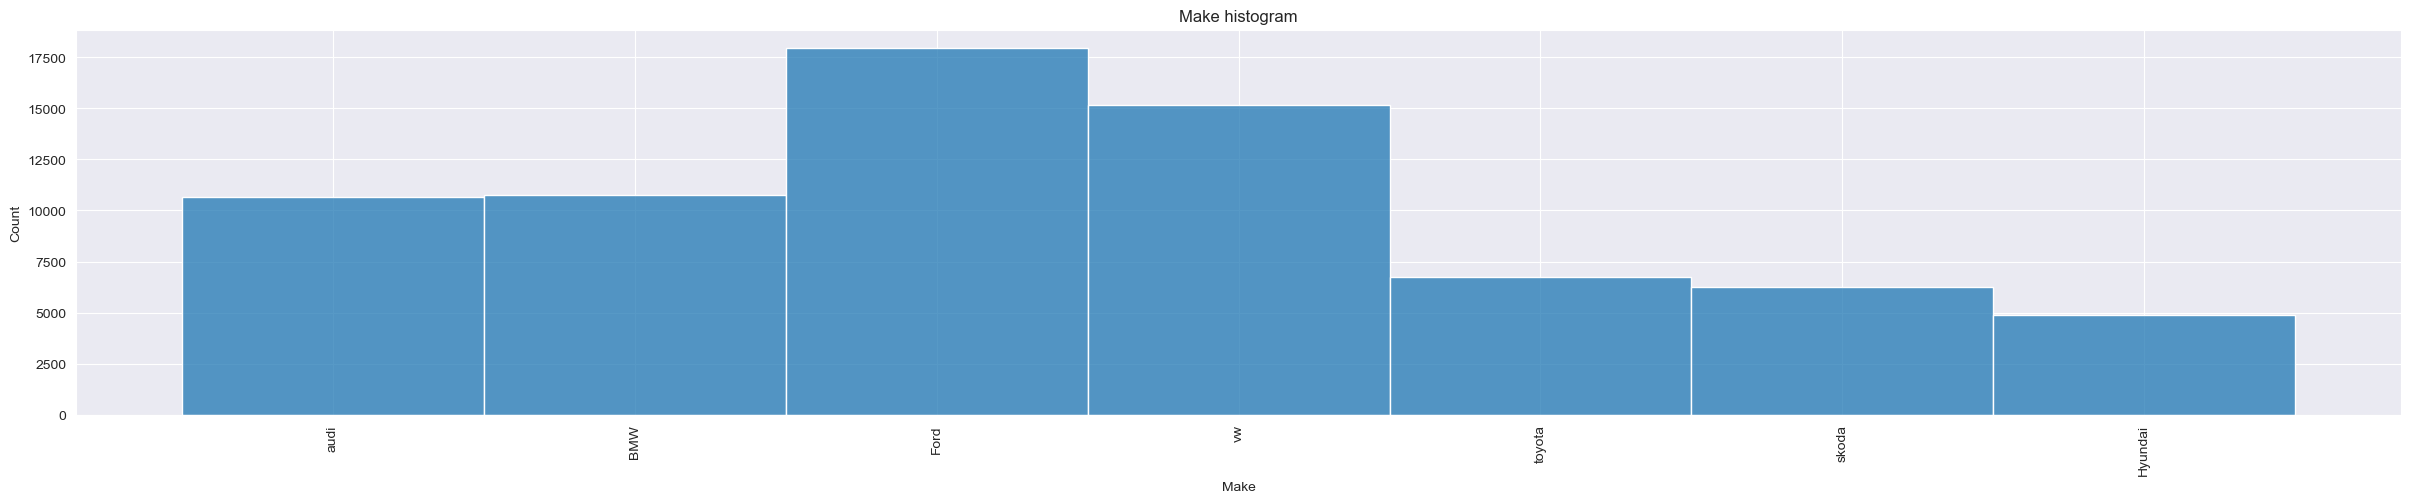

In [95]:
for col in data.columns:
    fig, ax = plt.subplots(figsize=(30, 5))
    ax.tick_params(axis='x', rotation=90)
    plt.title(f'{col} histogram')
    sns.histplot(data=data, x=col, ax=ax)
    plt.show()

In [ ]:
def train(X, y, learning_rate, epochs):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array()
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        db = np.mean(y_hat - y)
        W -= learning_rate * dW
        B -= learning_rate * db
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

In [97]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [98]:
def predict(X, W, B):
    pred = np.dot(X, W) + B
    return pred

In [99]:
def cost(y, y_hat):
    return 0.5 * np.mean(np.square(y_hat - y))

In [100]:
def test(X, y, W, b):
    y_hat = predict(X, W, b)
    return accuracy(y, y_hat)

In [101]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [102]:
def k_fold_cross_validation(X, y, K, lr, epochs):
    fold_size = len(X) // K
    accuracies = []
    for i in range(K):
        # Divide the data into training and testing sets
        X_train = np.concatenate([X[:i * fold_size], X[(i + 1) * fold_size:]])
        Y_train = np.concatenate([y[:i * fold_size], y[(i + 1) * fold_size:]])
        X_validate = X[i * fold_size:(i + 1) * fold_size]
        Y_validate = y[i * fold_size:(i + 1) * fold_size]
        # Train the model
        print(f"\nTraining at Iteration {i + 1} of {K}")
        w, b, Costs = train(X_train, Y_train, lr, epochs)
        # Test the model
        print(f"\nTesting at Iteration {i + 1} of {K}")
        acc = test(X_validate, Y_validate, w, b)
        print(f"Accuracy at Iteration {i + 1} of {K}: {acc}")
        accuracies.append(acc)
    return np.mean(accuracies), Costs, w, b

In [103]:
data.model = preprocessing.LabelEncoder().fit_transform(data.model)
data.transmission = preprocessing.LabelEncoder().fit_transform(data.transmission)
data.fuelType = preprocessing.LabelEncoder().fit_transform(data.fuelType)
data.Make = preprocessing.LabelEncoder().fit_transform(data.Make)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,15735,4,150.0,55.4,1.4,3
1,13,2016,16500,0,36203,0,20.0,64.2,2.0,3
2,8,2016,11000,1,29946,4,30.0,55.4,1.4,3
3,11,2017,16800,0,25952,0,145.0,67.3,2.0,3
4,10,2019,17300,1,1998,4,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,25906,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,59508,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,13810,4,20.0,60.1,1.0,2
72433,126,2018,13994,1,23313,4,145.0,44.8,1.6,2


In [111]:
data.mileage = standardize(data.mileage)
data

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make
17684,0,2014,3,0.558637,0,125.0,60.1,2.0,0
44479,49,2014,0,0.897621,0,20.0,72.4,1.6,6
11684,2,2017,0,0.481286,0,145.0,53.3,3.0,0
12247,2,2017,1,0.039308,0,125.0,60.1,2.0,0
31184,37,2018,1,-0.653006,4,145.0,54.3,1.0,1
...,...,...,...,...,...,...,...,...,...
27342,65,2019,1,-0.965879,4,145.0,47.9,1.2,1
35872,47,2012,1,2.437841,0,165.0,49.6,2.0,1
53809,122,2016,1,0.243795,0,30.0,61.4,1.6,6
37366,43,2017,1,0.641050,0,150.0,74.3,1.5,1


# Split

In [105]:
data = shuffle(data)
ytrain = np.array(data.price[:14487])
ytest = np.array(data.price[14487:])
data.drop('price', axis=1, inplace=True)
xtrain = data[:14487]
xtest = np.array(data[14487:])

In [ ]:
xtrain.columns

In [106]:
k = 10
iterations = 1000

In [112]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.1----------")
average_accuracy, c, w, b = k_fold_cross_validation(xtrain, ytrain, k, 0.1, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

----------K-Fold Cross Validation with 10 Folds and eta 0.1----------

Training at Iteration 1 of 10


Error evaluating: thread_id: pid_47100_id_2400874706064
frame_id: 2399338305408
scope: FRAME
attrs: costs
Traceback (most recent call last):
  File "C:\Users\moham\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\231.8109.197\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_vars.py", line 315, in resolve_compound_variable_fields
    return _typeName, _resolve_default_variable_fields(var, resolver, offset)
  File "C:\Users\moham\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\231.8109.197\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_vars.py", line 265, in _resolve_default_variable_fields
    return resolver.get_dictionary(VariableWithOffset(var, offset) if offset else var)
  File "C:\Users\moham\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\231.8109.197\plugins\python\helpers\pydev\pydevd_plugins\extensions\types\pydevd_plugin_numpy_types.py", line 94, in get_dictionary
    ret['min'] = obj.min()
  File "C:\Users\moham\anaconda3\lib\site-packages\numpy\core\_methods

In [ ]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.01----------")
average_accuracy, c, w, b = k_fold_cross_validation(xtrain, ytrain, k, 0.01, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

In [ ]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.001----------")
average_accuracy, c, w, b = k_fold_cross_validation(xtrain, ytrain, k, 0.001, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

In [ ]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.0001----------")
average_accuracy, c, w, b = k_fold_cross_validation(xtrain, ytrain, k, 0.0001, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)